<div style="text-align: center; background-color: cream;">
  <h1 style="color: #4B0082, font-family: 'Merriweather', serif;">US CRUDE OIL ANALYSIS</h1>
    <br>
    <b>By Abdulhamid Abdulhamid</b>
</div>

<img src="https://dmarketforces.com/wp-content/uploads/2022/10/Crude-Oil-Prices-Rise-as-US-Dollar-Slides-696x392.jpg" alt="image name" style="max-width: 100%;">

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusion">4. CONCLUSION </a></li>
</ul>

<div id='intro'></div>

## 1. Introduction
Crude oil is a naturally occurring, unrefined petroleum product composed of hydrocarbon deposits and other organic materials. It is a fossil fuel that is refined to produce usable products such as gasoline, diesel, and various forms of petrochemicals. The United States imports crude oil from various countries to supplement its domestic production.
This analysis on thisimportant as it not only enable us to understand trend, patterns and behaviour of the supply, but also le stakeholders to understand the source of pollution, identify countrues with better environmentally friendly crude oil, help make budget, and to also make forecast on the price of crude oil in years to come.
In this notebook, I will analyze the data across different regions and countries over the years to gain insights into their trends and behaviour. The analysis would also help the US government to make informed-decisons. finally, I will use this data to make future forecast of the quantity of crude oil.

### 1.1 Dataset description
The file `us_crude_oil_datat.csv` was obtained from [Kaggle](https://www.kaggle.com/datasets/alistairking/u-s-crude-oil-imports) website. It consists of crude oil importation to the US from 2009 to 2024. The file has the following columns:
- `year`: The year of the import.
- `month`:The month of the import.
- `originName`:	The name of the place where the crude oil was exported from.
- `originTypeName`:The type of location the crude oil was exported from (e.g. country, region, etc.).
- `destinationName`:The name of the place in the U.S. receiving the crude oil.
- `destinationTypeName`:The type of destination (e.g., port, refinery).
- `gradeName`:The grade or type of crude oil imported (e.g., Light Sweet, Heavy Sour).
- `quantity`:The volume of crude oil imported, measured in thousands of barrels.

### 1.2 Importing dependencies
The following packages are essential to running this project successfully: `numpy, pandas, matplotlib, seaborn, and sklearn`.

In [1]:
# importing data analysis libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import datetime
import datetime as dt

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings 
warnings.filterwarnings('ignore')

### 1.3 Loading the dataset

In [2]:
df = pd.read_csv("us_crude_oil_data.csv")

In [3]:
df.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,1,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,1,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,1,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10
3,2009,1,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381
4,2009,1,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851


In [4]:
df.tail()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
483048,2024,1,World,World,United States,United States,Heavy Sour,120942
483049,2024,1,World,World,United States,United States,Heavy Sweet,8859
483050,2024,1,World,World,United States,United States,Light Sour,7811
483051,2024,1,World,World,United States,United States,Light Sweet,12553
483052,2024,1,World,World,United States,United States,Medium,55237


<div id='wrangling'></div>

## 2. Data Wrangling
In this section, we will identify and address any errors, inconsistencies, missing values, or duplicate entries in the dataset. This will ensure that the dataset is accurate, consistent, and complete, and will make it more suitable for analysis. 

Thus we will address the following questions to ensure the quality and reliability of the dataset:
1. Check for missing values, duplicates, and outliers. These are all issues that may affect our analysis.

**1. Are there any missing values in the dataset, and if so, what is their extent and data type?**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483053 entries, 0 to 483052
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 483053 non-null  int64 
 1   month                483053 non-null  int64 
 2   originName           483053 non-null  object
 3   originTypeName       483053 non-null  object
 4   destinationName      483053 non-null  object
 5   destinationTypeName  483053 non-null  object
 6   gradeName            483053 non-null  object
 7   quantity             483053 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 29.5+ MB


From the above we can observe that there are no mising and no null values. But the year and month supposed to be in date-time format. Also, we need to create a column that contain the destination of the companies in the `destinationName` column later

**2. Are there are any duplicate values?**

In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

duplicate_rows

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity


This means that there are no duplicates values

**3. Check for Outliers**

In [7]:
df.quantity.sort_values(ascending=False)

344943    141016
257194    140989
352401    140611
296980    140133
294441    140107
           ...  
160592         1
269376         1
188808         1
203340         1
398656         1
Name: quantity, Length: 483053, dtype: int64

<AxesSubplot:xlabel='quantity'>

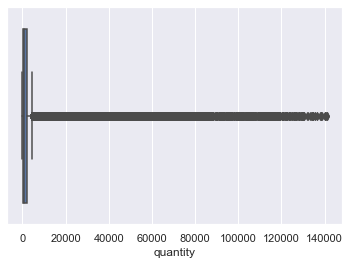

In [8]:
sns.boxplot(x=df['quantity'], orient="v", )

This huge outliers are due to the fact that the dataframe contains Countries and Continents. Thus the wuantity of crude oil constitutees these outliers. We will segregate the dataframe into countries and continents

The name of the countries and the cities are inconsistent, we can standardize all the citiesby create a dictionary. We wil also remove some characters from the values.

In [9]:
#This function removes any slash from the values
def remove_slash(destination_name):
    if "/" in destination_name:
        return destination_name[-2:]
    else:
        return destination_name

In [10]:
# Apply the function to the 'destinationName' column
df['destinationName'] = df['destinationName'].apply(remove_slash)

In [11]:
# Create a dictionary for all cities in the United States
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 
    'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
    
}

# Function to replace abbreviations with full state names
def replace_with_full_name(value):
    # Check if the value matches any abbreviation
    for abbr, full_name in state_abbreviations.items():
        if abbr in value:
            return value.replace(abbr, full_name)
    return value

# Apply the function to the 'location' column
df['destination_city'] = df['destinationName'].apply(replace_with_full_name)

In [12]:
df.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity,destination_city
0,2009,1,Belize,Country,TX,Refinery,Light Sour,61,Texas
1,2009,1,Belize,Country,TX,Refinery,Light Sour,62,Texas
2,2009,1,Algeria,Country,LA,Refinery,Light Sweet,10,Louisiana
3,2009,1,Algeria,Country,TX,Refinery,Light Sweet,381,Texas
4,2009,1,Algeria,Country,TX,Refinery,Light Sweet,851,Texas


The destination_city names are now in appropriate format

In [13]:
df.drop(['destinationName'], axis=1, inplace=True)

- ***Convert `month`column data type to `month name` for better readibility*** 

In [14]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

<div id='eda'></div>

## 3. Exploratory Data Analysis

This section explores the dataset in order to extract useful information.


**1. What are the summary statistics of the dataset?**

In [15]:
# get the summary statisitcs of the datset
df.describe()

,year,month,quantity
count,483053.000000,483053.000000,483053.000000
mean,2015.388875,6.459825,2425.239876
std,4.295262,3.435325,6367.700629
min,2009.000000,1.000000,1.000000
25%,2012.000000,3.000000,359.000000
50%,2015.000000,6.000000,804.000000
75%,2019.000000,9.000000,2008.000000
max,2024.000000,12.000000,141016.000000


The exportation of crude oil occured between 2009 to 2024. The highest quantity stood at 141016 barrels/day.

**2. What is the quantity supplied by different countries and regions?**

In [16]:
# Quantity Supplied by each origin type Name
origin_type_name = df.groupby('originTypeName')['quantity'].sum()

In [17]:
origin_type_name

originTypeName
Country          292894791
OPEC/non-OPEC    292864908
Region           292864908
World            292894791
Name: quantity, dtype: int64

In [18]:
# let's filter the dataframe by region and calculate the Quantity exported by each Region
region = df[df['originTypeName'] == "Region"]
region

,year,month,originName,originTypeName,destinationTypeName,gradeName,quantity,destination_city
1261,2009,1,Africa,Region,Refinery,Light Sweet,665,Louisiana
1262,2009,1,Africa,Region,Refinery,Medium,2417,Louisiana
1263,2009,1,Africa,Region,Refinery,Light Sweet,381,Texas
1264,2009,1,Africa,Region,Refinery,Light Sweet,1501,Texas
1265,2009,1,Africa,Region,Refinery,Medium,474,Texas
...,...,...,...,...,...,...,...,...
482172,2024,1,Canada (Region),Region,United States,Heavy Sour,94239,United States
482173,2024,1,Canada (Region),Region,United States,Heavy Sweet,7369,United States
482174,2024,1,Canada (Region),Region,United States,Light Sour,3293,United States
482175,2024,1,Canada (Region),Region,United States,Light Sweet,2809,United States


In [19]:
region = df.groupby('originTypeName')['quantity'].sum()
region

originTypeName
Country          292894791
OPEC/non-OPEC    292864908
Region           292864908
World            292894791
Name: quantity, dtype: int64

Text(0.5, 1.0, 'Quantity of Crude Oil Exported to US from different Origin Type')

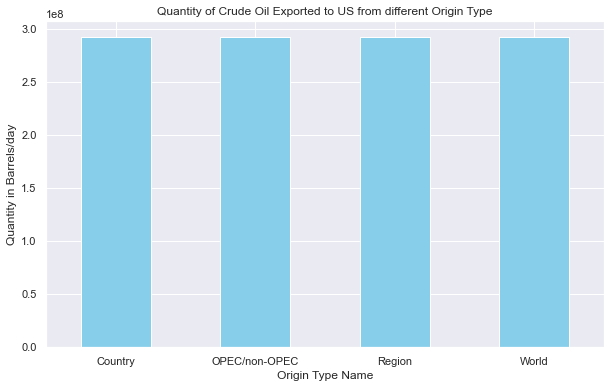

In [20]:
plt.figure(figsize = (10,6))
region.plot(kind = "bar", color = "skyblue")
plt.xlabel("Origin Type Name")
plt.ylabel("Quantity in Barrels/day")
plt.xticks(rotation = 0)
plt.title("Quantity of Crude Oil Exported to US from different Origin Type")

We can deduce from the above graph that the quantity supplied by different regions is nearly the same

In [21]:
# Quantity supplied by each Continent
continent = df[df['originTypeName'] == "Region"]
continent.head()

,year,month,originName,originTypeName,destinationTypeName,gradeName,quantity,destination_city
1261,2009,1,Africa,Region,Refinery,Light Sweet,665,Louisiana
1262,2009,1,Africa,Region,Refinery,Medium,2417,Louisiana
1263,2009,1,Africa,Region,Refinery,Light Sweet,381,Texas
1264,2009,1,Africa,Region,Refinery,Light Sweet,1501,Texas
1265,2009,1,Africa,Region,Refinery,Medium,474,Texas


In [22]:
continent_group = continent.groupby('originName')['quantity'].sum()
continent_group

originName
Africa              28430339
Asia-Pacific         1622775
Canada (Region)    119406217
Eurasia              5201245
Europe               2933049
Middle East         53983965
Other Americas      81287318
Name: quantity, dtype: int64

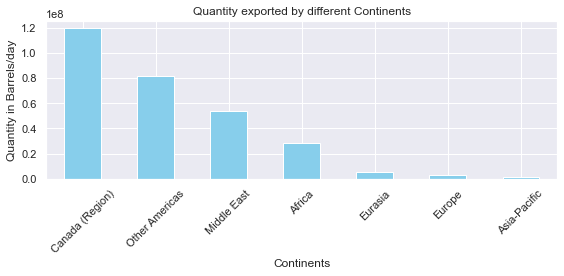

In [23]:
plt.figure(figsize = (8,4))
continent_group.sort_values(ascending = False).plot(kind = "bar", color = "skyblue")
plt.title("Quantity exported by different Continents")
plt.xlabel("Continents")
plt.ylabel("Quantity in Barrels/day")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Quantity of crude oil exported by Canada stood higher followed by Other Americas. However, Eurasia, Europe, and Asia-pacific are quite smaller combined with Middle east and Africa

In [24]:
# Quantity exported by each Country
country = df[df['originTypeName'] == "Country"]
country

,year,month,originName,originTypeName,destinationTypeName,gradeName,quantity,destination_city
0,2009,1,Belize,Country,Refinery,Light Sour,61,Texas
1,2009,1,Belize,Country,Refinery,Light Sour,62,Texas
2,2009,1,Algeria,Country,Refinery,Light Sweet,10,Louisiana
3,2009,1,Algeria,Country,Refinery,Light Sweet,381,Texas
4,2009,1,Algeria,Country,Refinery,Light Sweet,851,Texas
...,...,...,...,...,...,...,...,...
481637,2024,1,Brazil,Country,United States,Light Sweet,497,United States
481638,2024,1,Brazil,Country,United States,Medium,5448,United States
481639,2024,1,Mexico,Country,United States,Heavy Sour,7700,United States
481640,2024,1,Mexico,Country,United States,Light Sour,2496,United States


In [25]:
country_group = country.groupby("originName")['quantity'].sum()
top_5_countries = country_group.sort_values(ascending = False).head()
top_5_countries

originName
Canada          119406217
Saudi Arabia     33678442
Mexico           29971333
Venezuela        22031954
Iraq             13751493
Name: quantity, dtype: int64

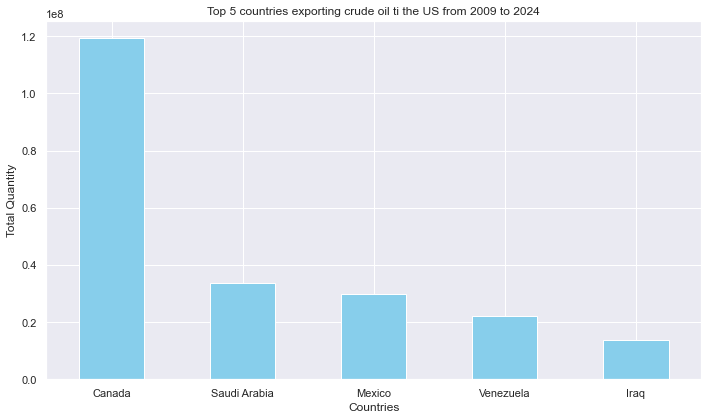

In [26]:
plt.figure(figsize = (10,6))
top_5_countries.plot(kind = "bar", color = "skyblue")
plt.title("Top 5 countries exporting crude oil ti the US from 2009 to 2024")
plt.xlabel("Countries")
plt.ylabel("Total Quantity")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Canada supply more crude oil to the US far better than Saudi Arbia, Mexico countries, and venezuela combined. Iraq export least quantity. 

In [27]:
least_5_countries = country_group.sort_values().head()
least_5_countries

originName
Barbados             350
Spain               1358
South Africa        3619
Panama              4354
Papua New Guinea    4767
Name: quantity, dtype: int64

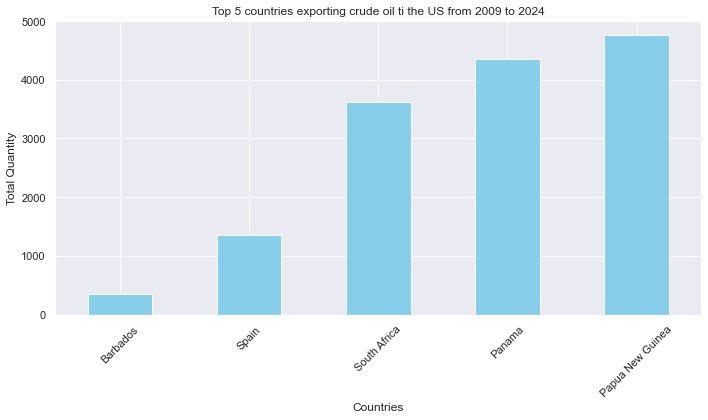

In [28]:
plt.figure(figsize = (10,6))
least_5_countries.plot(kind = "bar", color = "skyblue")
plt.title("Top 5 countries exporting crude oil ti the US from 2009 to 2024")
plt.xlabel("Countries")
plt.ylabel("Total Quantity")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [29]:
df["gradeName"].unique()

array(['Light Sour', 'Light Sweet', 'Heavy Sweet', 'Heavy Sour', 'Medium'],
      dtype=object)

In [30]:
# Quantity supplied to each destination
destination = df.groupby('destinationTypeName')['quantity'].sum()
destination

destinationTypeName
Port              167359914
Port PADD         167359914
Port State        167359914
Refinery          167359914
Refinery PADD     167359914
Refinery State    167359914
United States     167359914
Name: quantity, dtype: int64

In [31]:
# Quantity of different grade. Heavy sour has high level of impurity. Thus it's environmentally unfriendly.
grade_name = df.groupby('gradeName')['quantity'].sum()
grade_name = grade_name.sort_values(ascending = False).head()
grade_name

gradeName
Heavy Sour     598600688
Medium         372162574
Light Sweet     99507912
Light Sour      55276984
Heavy Sweet     45971240
Name: quantity, dtype: int64

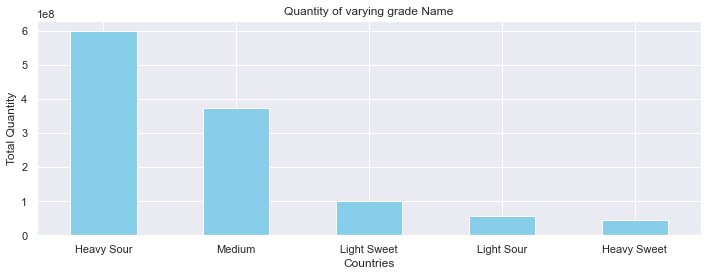

In [32]:
plt.figure(figsize = (10,4))
grade_name.plot(kind = "bar", color = "skyblue")
plt.title("Quantity of varying grade Name")
plt.xlabel("Countries")
plt.ylabel("Total Quantity")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [33]:
# Clustered bar chart

In [34]:
# Trend of crude oil importation from 2009 to 2023. Only January is in 2024, so we can drop it
year_qty = df[['year','quantity']]
year_qty.head()

,year,quantity
0,2009,61
1,2009,62
2,2009,10
3,2009,381
4,2009,851


In [35]:
year_qty.head()

,year,quantity
0,2009,61
1,2009,62
2,2009,10
3,2009,381
4,2009,851


In [36]:
group_year_qty = year_qty.groupby("year")['quantity'].sum()/1000000
group_year_qty

year
2009    95.269076
2010    97.581904
2011    93.872828
2012    86.378796
2013    78.700272
2014    75.049128
2015    75.247452
2016    80.446408
2017    81.483304
2018    79.381288
2019    69.253016
2020    60.324572
2021    62.620782
2022    64.215886
2023    65.943430
2024     5.751256
Name: quantity, dtype: float64

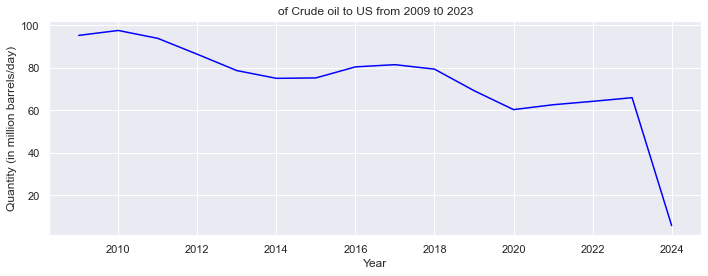

In [37]:
plt.figure(figsize=(10, 4))
group_year_qty.plot(kind='line', color='blue')
plt.title('of Crude oil to US from 2009 t0 2023')
plt.xlabel('Year')
plt.ylabel('Quantity (in million barrels/day)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
#Lets split the dataset into training and test dataset
from sklearn.model_selection import train_test_split

# Features and target
X = df[['year']]
y = df['quantity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Let's use a linear regression model for this example:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [40]:
#Use the trained model to make predictions:

# Make predictions
y_pred = model.predict(X_test)

# Display the predictions
y_pred

array([2377.92654085, 2369.25389449, 2421.28977268, ..., 2438.63506541,
       2429.96241904, 2412.61712631])

In [41]:
#Evaluate the model using metrics like Mean Absolute Error (MAE) and Mean Squared Error (MSE):

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

mae, mse

(2656.3101005455783, 41734966.5622714)

In [42]:
y_pred

array([2377.92654085, 2369.25389449, 2421.28977268, ..., 2438.63506541,
       2429.96241904, 2412.61712631])

<div id='conclusion'></div>

## 4. CONCLUSION

In our analysis, we get valuable insights from this dataset. we have seen the top continenets and countries that contribute more crude oil to the US. We also get to know the differrent types of crude oil mostly imported. This analysis is helpful for the government to make evidence-based decisions.